<a href="https://colab.research.google.com/github/eduard-ignatev/high-performance-python/blob/main/03_hw/image_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Mar 23 18:07:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P0             27W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [3]:
import requests
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt

from scipy import misc, ndimage
from cupyx.scipy import ndimage as cp_ndimage
from cupyx.profiler import benchmark
from PIL import Image

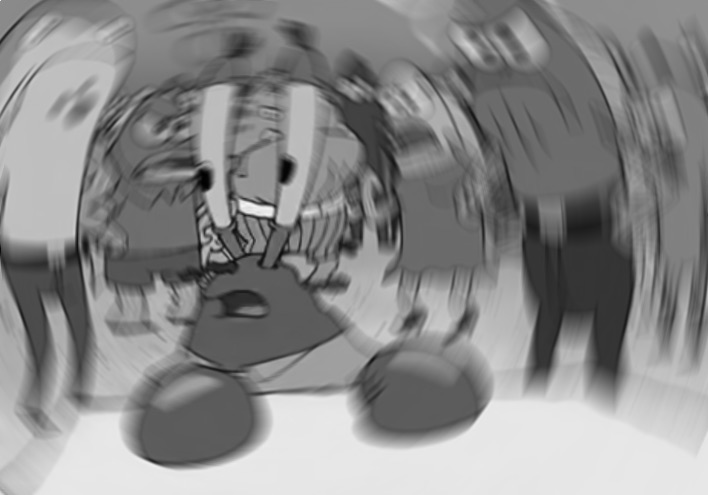

In [4]:
url = 'https://imgflip.com/s/meme/Mr-Krabs-Blur-Meme.jpg'
img = Image.open(requests.get(url, stream=True).raw).convert('L')
img

## Median Filter

In [5]:
def cpu_median_filter(img, size=10, mode='nearest'):
    np_img = np.array(img)
    np_img_median = ndimage.median_filter(np_img, size=size, mode=mode)
    return np_img_median

In [6]:
def gpu_median_filter(img, size=10, mode='nearest'):
    cp_img = cp.array(img)
    cp_img_median = cp_ndimage.median_filter(cp_img, size=size, mode=mode)
    return cp_img_median

array([[140, 140, 140, ..., 143, 143, 143],
       [140, 140, 140, ..., 143, 143, 143],
       [140, 140, 140, ..., 143, 143, 143],
       ...,
       [183, 178, 178, ..., 231, 231, 231],
       [196, 191, 180, ..., 231, 231, 231],
       [206, 196, 191, ..., 231, 231, 231]], dtype=uint8)
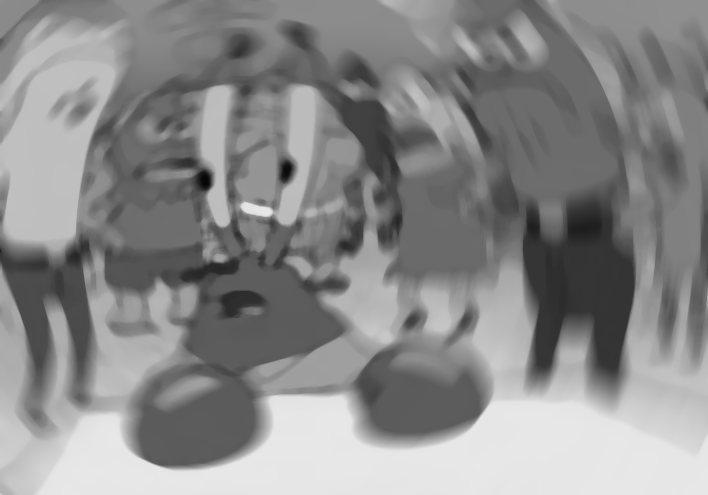

In [7]:
cpu_median_filter(img)

In [8]:
gpu_median_filter(img)

array([[140, 140, 140, ..., 143, 143, 143],
       [140, 140, 140, ..., 143, 143, 143],
       [140, 140, 140, ..., 143, 143, 143],
       ...,
       [183, 178, 178, ..., 231, 231, 231],
       [196, 191, 180, ..., 231, 231, 231],
       [206, 196, 191, ..., 231, 231, 231]], dtype=uint8)

In [9]:
%%timeit
cpu_median_filter(img)

878 ms ± 380 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
gpu_median_filter(img)
cp.cuda.Device().synchronize()

3.12 ms ± 409 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Histogram

In [11]:
def cpu_histogram(img, bins=64):
    np_img = np.array(img)
    np_hist = np.histogram(np_img, bins=64)
    return np_hist

In [12]:
def gpu_histogram(img, bins=64):
    cp_img = cp.array(img)
    cp_hist = cp.histogram(cp_img, bins=64)
    return cp_hist

In [13]:
%%timeit
cpu_histogram(img)

4.47 ms ± 88 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
%%timeit
gpu_histogram(img)
cp.cuda.Device().synchronize()

900 µs ± 73.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


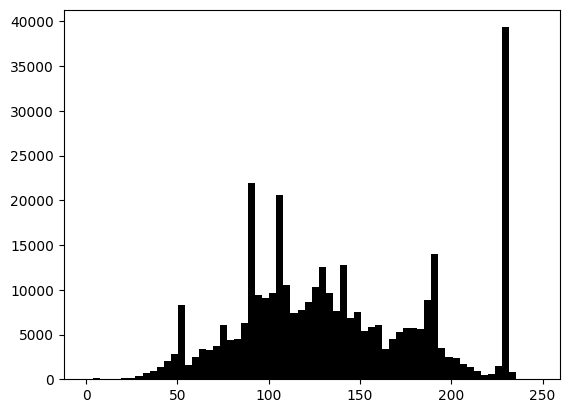

In [15]:
hist_values, bin_edges = cpu_histogram(img)
plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), align='edge', color='black')
plt.show()